In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf


def difference_matrix(blurry_image , real_image):
    all_differences = []
    blurry_image1 = np.array(blurry_image)
    real_image1 = np.array(real_image)
    diff_matrix = blurry_image1 - real_image1
    d1iff_matrix = -1*diff_matrix
    x =471
    y = 471
    for i in range(0,len(diff_matrix)-y, y):
        for j in range(0, len(diff_matrix[i]) - x , x):
            all_differences.append(diff_matrix[i : i+y , j:j+x])
    all_differences = np.array(all_differences)
    return all_differences 


def blurry_matrix(blurry_image):
    all_blurry = []
    blurry_image1 = np.array(blurry_image)
    x =250
    y = 250
    for i in range(0,len(blurry_image1)-y, int(y)):
        for j in range(0, len(blurry_image1[i]) - x , int(x)):
            all_blurry.append(blurry_image1[i : i+y , j:j+x])
    all_blurry = np.array(all_blurry)
    return all_blurry


def comparison(matrix1 , matrix2):
    difference = matrix1 - matrix2
    difference = np.absolute(difference)
    result = np.sum(difference)
    return result


def deblur(blurry_image , all_blurry_matrix , all_real_matrix):
    blurry_image1 = np.array(blurry_image)
    print(blurry_image1)
    x = 250
    y = 250
    for i in range(0,len(blurry_image1)-y, y):
        for j in range(0, len(blurry_image1[i]) - x , x):
            closest = 100000000
            closest_array = []
            best_index = 0
            score = 0
            for z in range(len(all_blurry_matrix)):
                score = comparison(blurry_image1[i : i+y , j:j+x], all_blurry_matrix[z])
                if (score < closest):
                    closest = score
                    #print("new highest : ")
                    #print(closest)
                    best_index = z
                    print(best_index)
            for t in range(i , i+y):
                for k in range(j , j+x):
                    blurry_image1[t][k] = all_real_matrix[best_index][t-i][k-j]
            plt.imshow(blurry_image1 , cmap = 'gray')
            plt.show()
            
    return blurry_image1

2021-09-11 13:07:43.299529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-11 13:07:43.299637: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [113]:
temp = blurry_matrix(all_real_train[0])
print(temp[1])


[[195 199 200 ... 202 206 200]
 [194 200 207 ... 202 210 205]
 [196 208 211 ... 201 206 211]
 ...
 [205 202 200 ... 206 198 200]
 [204 199 208 ... 211 207 208]
 [199 204 215 ... 208 211 214]]


In [6]:
DATADIR = "/home/jacem/Documents/tokeep/helsinkewi/step8/Times"
CATEGORIES = ["CAM01" , "CAM02"]

all_real_train = []
all_blurry_train = []
all_real_test = []
all_blurry_test = []
for category in CATEGORIES:
    path = os.path.join(DATADIR , category)
    print(len(os.listdir(path)))
    counter = 0
    for img in os.listdir(path):  
        if(counter < 190):
            if(img.endswith(".tif")):
                img_array = cv2.imread(os.path.join(path ,img), cv2.IMREAD_GRAYSCALE)
                if(category == "CAM01"):
                    all_real_train.append(img_array)
                if(category == "CAM02"):
                    all_blurry_train.append(img_array)
        else:
            if(img.endswith(".tif")):
                img_array = cv2.imread(os.path.join(path ,img), cv2.IMREAD_GRAYSCALE)
                if(category == "CAM01"):
                    all_real_test.append(img_array)
                if(category == "CAM02"):
                    all_blurry_test.append(img_array)
        counter+=1
            #plt.imshow(img_array , cmap = 'gray')
            #plt.show()

203
203


In [3]:
all_real_train = np.array(all_real_train)
all_blurry_train = np.array(all_blurry_train)
all_real_test = np.array(all_real_test)
all_blurry_test = np.array(all_blurry_test)

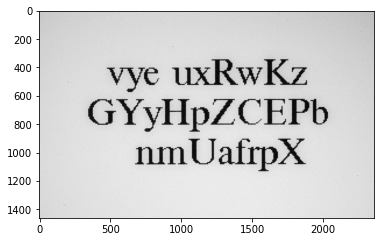

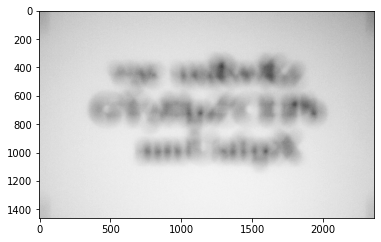

94
94
9
9


In [3]:
plt.imshow(all_real_train[1] , cmap = 'gray')
plt.show()
plt.imshow(all_blurry_train[1] , cmap = 'gray')
plt.show()
print(len(all_real_train))
print(len(all_blurry_train))
print(len(all_real_test))
print(len(all_blurry_test))

In [111]:
print(len(all_real_train[0]))
print(len(all_blurry_train[0][0]))

1460
2360


In [2]:
blur_image = []
real_image = []
for i in range(1040):
    blur_image_x = []
    real_image_x = []
    for j in range(720):
        blur_image_x.append(random.randint(0,255))
        real_image_x.append(random.randint(0,255))
    blur_image.append(blur_image_x)
    real_image.append(real_image_x)

#print("the small part is")
#print(image1[0 : 3 , 0:3])
#print("second small part is :")
#print(image1[3:6 , 0:3])
#print("second small part is :")
#print(image1[0:3 , 3:6])

In [10]:
all_real_matrix = []
all_blurry_matrix = []

for i in range(len(all_blurry_train)):  
    temp_real = blurry_matrix(all_real_train[i])
    temp_blurry = blurry_matrix(all_blurry_train[i])
    for j in range(len(temp_real)):
        all_real_matrix.append(temp_real[j])
        all_blurry_matrix.append(temp_blurry[j])

all_real_matrix_test = []
all_blurry_matrix_test = []

for i in range(len(all_blurry_test)):  
    temp_real1 = blurry_matrix(all_real_test[i])
    temp_blurry1 = blurry_matrix(all_blurry_test[i])
    for j in range(len(temp_real)):
        all_real_matrix_test.append(temp_real1[j])
        all_blurry_matrix_test.append(temp_blurry1[j])


print(all_real_matrix[1])
print(all_blurry_matrix[1])
print(len(all_real_matrix))
print(len(all_blurry_matrix))


print(all_real_matrix_test[1])
print(all_blurry_matrix_test[1])
print(len(all_real_matrix_test))
print(len(all_blurry_matrix_test))
#closest = 100000000
#closest_array = []
#best_index = 0
#for i in range (len(all_blurry[0])):
    #(comparison(all_blurry[0][0] , all_real[0][i]))
    #if (comparison(all_blurry[0][0] , all_real[0][i]) < closest):
        #closest = comparison(all_blurry[0][0] , all_real[0][i])
        #print("new highest : ")
        #print(closest)
        #closest_array = all_real[0][i]
        #best_index = i
#print(closest_array)
#print(all_blurry[0][0])
#print(all_real[0][0])


[[209 199 196 ... 215 212 209]
 [216 202 197 ... 210 204 204]
 [207 198 201 ... 205 198 198]
 ...
 [211 214 210 ... 213 209 210]
 [212 212 208 ... 214 219 222]
 [208 210 212 ... 217 215 213]]
[[209 212 222 ... 226 225 221]
 [213 221 220 ... 216 221 231]
 [218 212 224 ... 208 204 216]
 ...
 [224 225 214 ... 225 232 236]
 [223 229 232 ... 221 236 234]
 [216 223 234 ... 230 229 231]]
4230
4230
[[208 197 193 ... 214 209 204]
 [216 199 195 ... 208 204 204]
 [204 197 200 ... 201 198 201]
 ...
 [215 212 207 ... 213 208 211]
 [211 206 203 ... 214 218 220]
 [206 208 208 ... 215 212 212]]
[[207 223 234 ... 219 219 223]
 [224 215 228 ... 217 220 223]
 [225 222 217 ... 230 231 224]
 ...
 [229 226 227 ... 232 233 227]
 [232 220 227 ... 234 234 233]
 [215 227 231 ... 223 223 235]]
405
405


In [13]:
all_real_matrix = np.array(all_real_matrix)
all_blurry_matrix = np.array(all_blurry_matrix)
all_real_matrix_test = np.array(all_real_matrix_test)
all_blurry_matrix_test = np.array(all_blurry_matrix_test)

In [18]:
all_real_matrix = tf.keras.utils.normalize(all_real_matrix , axis=1)
all_blurry_matrix = tf.keras.utils.normalize(all_blurry_matrix , axis=1)
all_real_matrix_test = tf.keras.utils.normalize(all_real_matrix_test , axis=1)
all_blurry_matrix_test = tf.keras.utils.normalize(all_blurry_matrix_test , axis=1)

In [4]:
all_real_matrix = tf.keras.utils.normalize(all_real_matrix , axis=1)
all_blurry_matrix = tf.keras.utils.normalize(all_blurry_matrix , axis=1)
print(all_real_matrix[0])
print(all_blurry_matrix[1])

[[0.10285755 0.10323841 0.11095986 ... 0.11274206 0.10817919 0.10756051]
 [0.10113368 0.10613837 0.11269361 ... 0.11105934 0.10873681 0.10756051]
 [0.10515604 0.10497839 0.11038194 ... 0.10937663 0.11152493 0.11090436]
 ...
 [0.1166485  0.11019831 0.10691445 ... 0.11554659 0.11654356 0.10923243]
 [0.10975302 0.10845833 0.10980403 ... 0.11049844 0.11375543 0.11090436]
 [0.10573066 0.10961831 0.1086482  ... 0.11554659 0.11710118 0.11480552]]
[[0.10414958 0.10456982 0.11229357 ... 0.10888618 0.11451738 0.11051936]
 [0.11572176 0.10667173 0.10232358 ... 0.10477727 0.11451738 0.10740614]
 [0.1183518  0.11613031 0.10074937 ... 0.11248148 0.09852622 0.11570806]
 ...
 [0.11361773 0.11560483 0.11596673 ... 0.11453594 0.11606491 0.11622693]
 [0.11677378 0.11245197 0.10337306 ... 0.11710401 0.11451738 0.11311371]
 [0.10572761 0.10982459 0.11439252 ... 0.11556317 0.11090647 0.11103823]]


In [20]:
from keras import models, layers

model = tf.keras.models.Sequential()

#encode
model.add(layers.Conv2D(640, (2, 2), strides = 1, padding = 'same', input_shape = (250, 250, 1)))
model.add(layers.Conv2D(320, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2D(160, (2, 2), strides = 1, padding = 'same'))

#latent
model.add(layers.Conv2D(80, (2, 2), strides = 1, padding = 'same'))
#decode
model.add(layers.Conv2DTranspose(160, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(320, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(640, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(1, (1, 1), strides = 1, activation = 'sigmoid', padding = 'same'))



In [21]:
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(all_blurry_matrix.reshape(-1, 250, 250, 1) , 
all_real_matrix.reshape(-1, 250, 250, 1) , epochs = 50, batch_size = 2000, validation_data = (all_blurry_matrix_test.reshape(-1, 250, 250, 1) ,                    
all_real_matrix_test.reshape(-1, 250, 250, 1)))

Epoch 1/50


2021-09-11 13:42:42.991095: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at conv_ops_fused_impl.h:846 : Resource exhausted: OOM when allocating tensor with shape[2000,250,250,640] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu


ResourceExhaustedError:  OOM when allocating tensor with shape[2000,250,250,640] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential_3/conv2d_12/BiasAdd (defined at tmp/ipykernel_11538/2948933508.py:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_4591]

Function call stack:
train_function


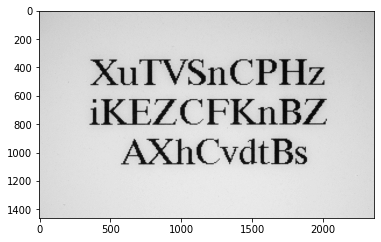

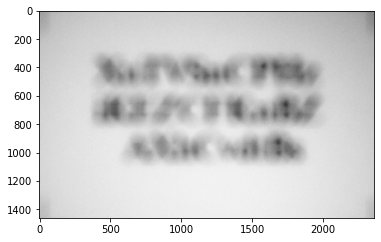

[[175 195 206 ... 179 170 174]
 [184 196 208 ... 197 196 167]
 [212 193 195 ... 204 202 190]
 ...
 [222 229 205 ... 214 219 206]
 [218 209 224 ... 219 228 222]
 [207 213 222 ... 204 214 222]]
0
8
33
430


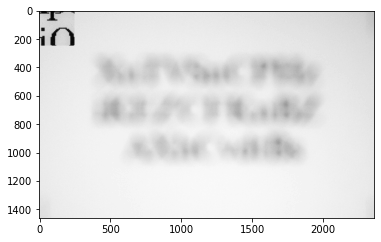

0
8
143
2888
3428


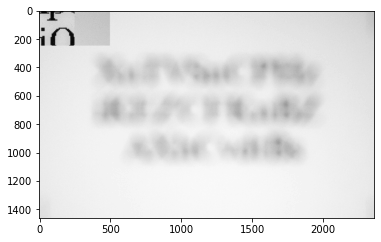

0
8
143
233
998
1898


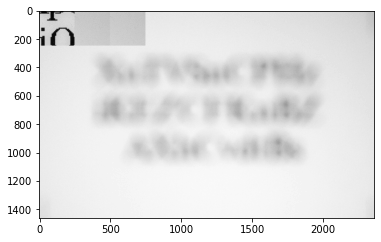

0
8
143
998
2528


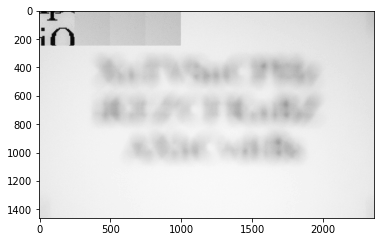

0
8
143
998
1898
2888


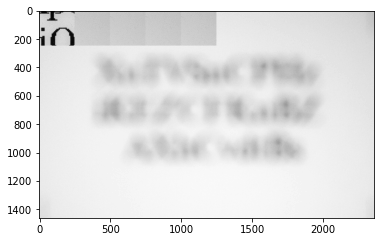

0
7
8
143
1898


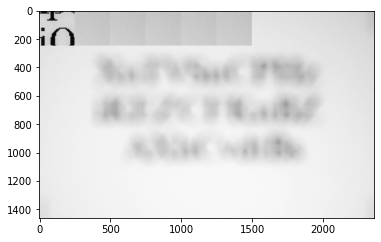

0
8
143
998


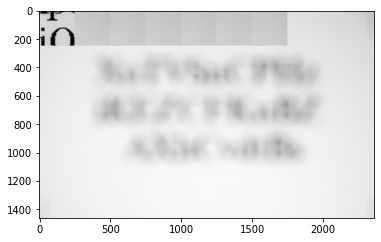

0
8
143
430
475


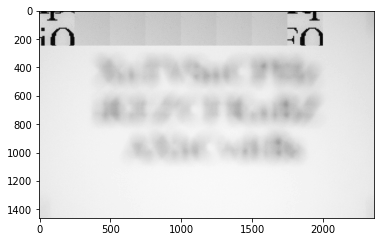

0
8
12
13
33
200
1235


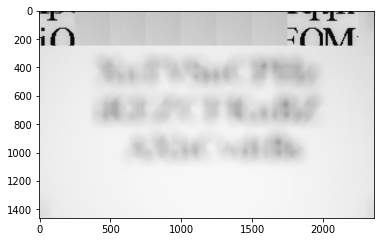

0
8
143
1898


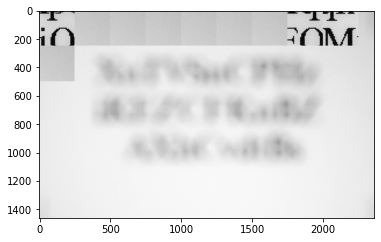

0
8
143
375
3706


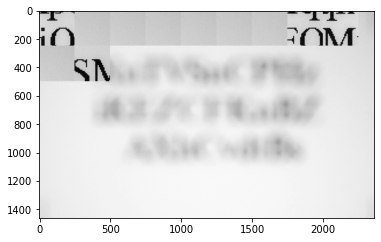

0
8
12
13
150
200
375
1410
3706
3931


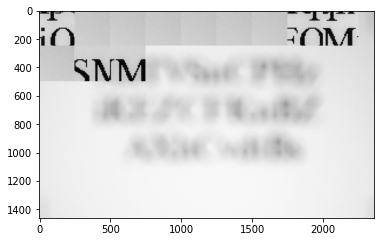

0
8
12
13
200
375
1410


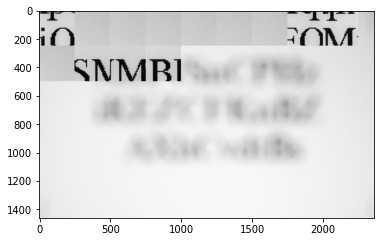

0
8
12
13
200
375
1410


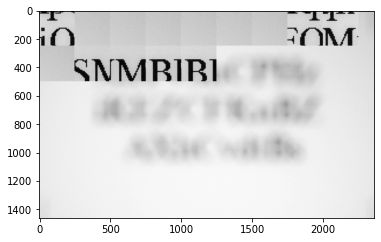

0
7
8
12
13
106
149
375
556
1410
3121


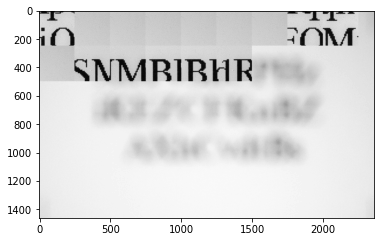

0
8
12
13
146
200
375
1410


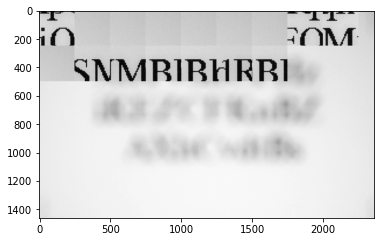

0
7
8
13
200
556
1410
3121
3256
3931


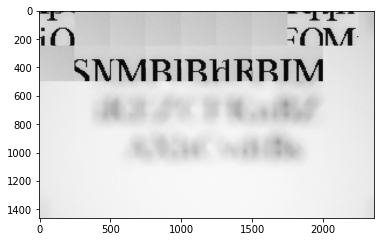

0
8
143
773
998
1898


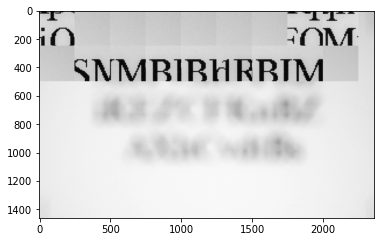

0
8
143
233
773
1898
3428


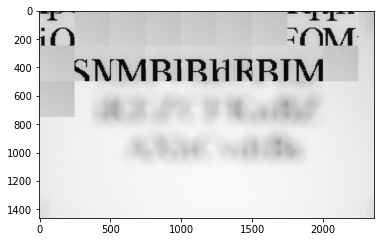

0
7
8
113
115
375
384
3444
3534


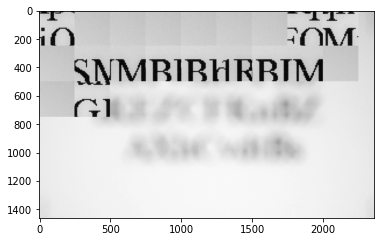

0
8
12
13
150
200
375
1410


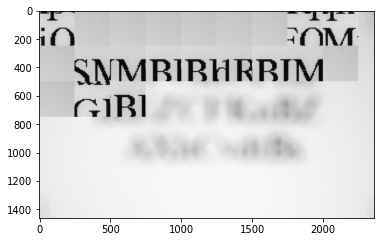

0
8
12
13
15
115
200
3706


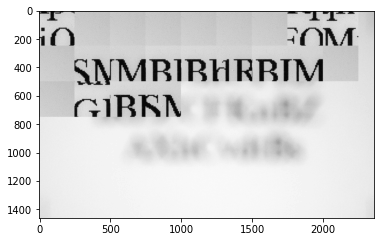

0
8
12
13
15
150
200
375
1235
1687
1955
3444
3706


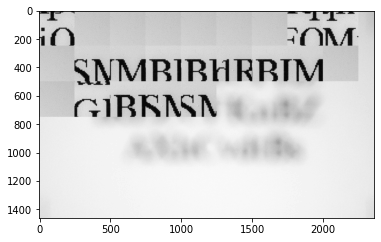

0
8
12
13
33
115
200
556
695
3121


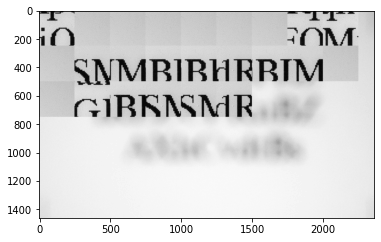

0
8
12
15
33
375
1410


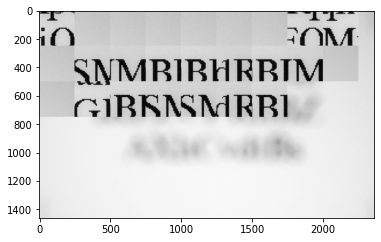

0
8
12
13
375
556
1410
3121
3931


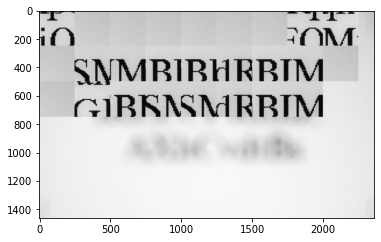

0
7
8
143
998


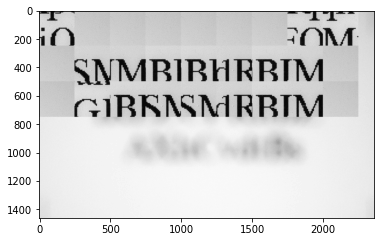

0
8
188


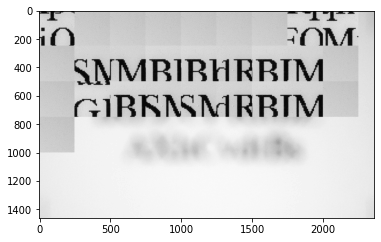

0
7
8
143
188
233


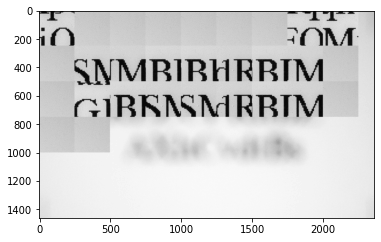

0
7
8
33
384
430
923
1235
2414
3714


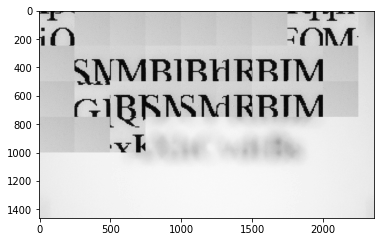

0
8
12
13
15
33
695
1235


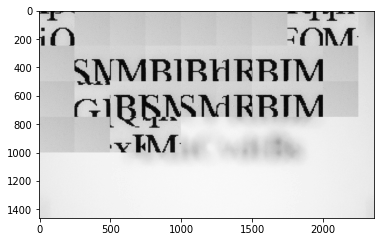

0
7
8
13
15
22
24
30
33


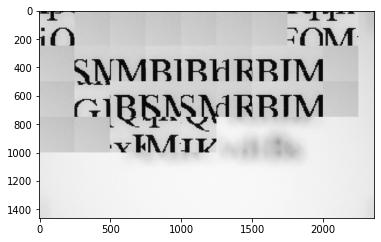

0
7
8
15
24
30
33
384
2138
2414
3444
3714


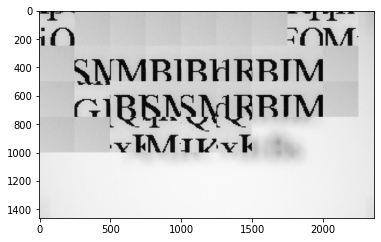

0
8
12
13
15
33
375
1410
3706


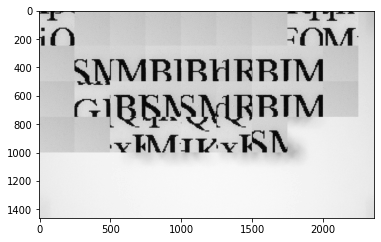

0
8
30
33
257
430
970


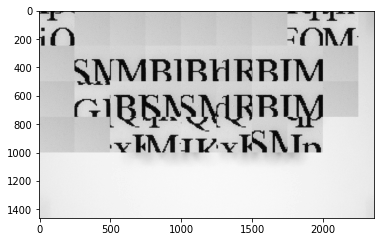

0
7
8
143
998


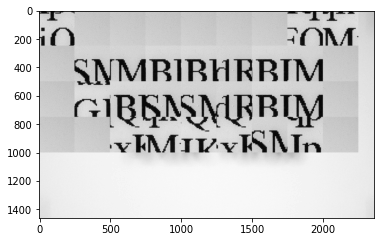

0
8
683
773
2258


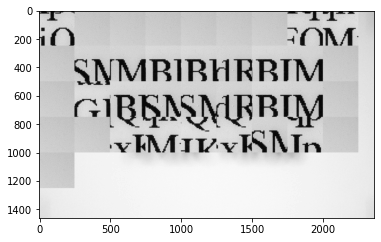

0
7
45
107


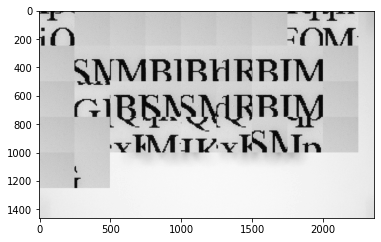

0
6
7
8
53
593
841


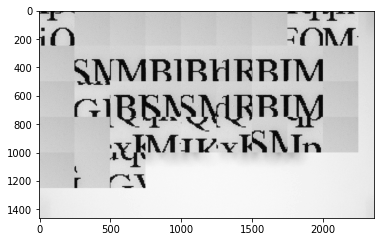

0
8
143
188
619


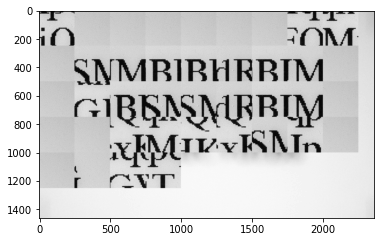

0
135
180
214
394
619


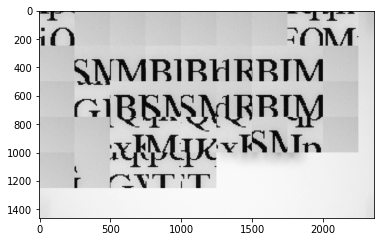

0
7
8
143
619


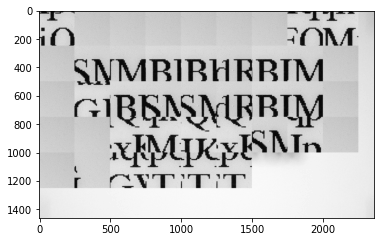

0
8
143
233
619


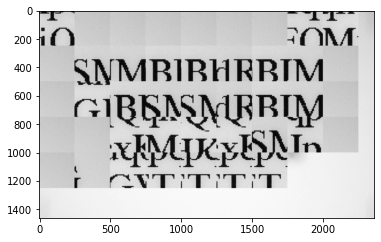

0
135
2880


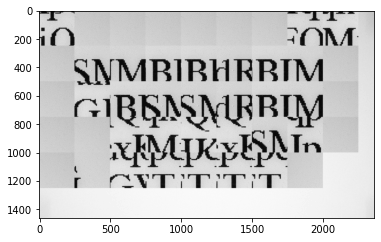

0
7
8
53
638
3383


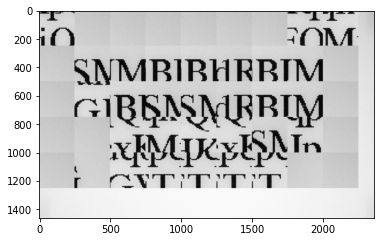

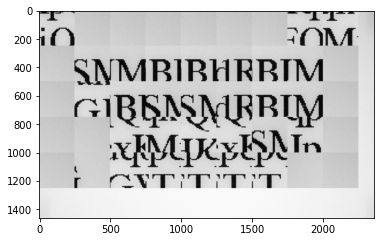

In [5]:
plt.imshow(all_real_test[0] , cmap = 'gray')
plt.show()
plt.imshow(all_blurry_test[0] , cmap = 'gray')
plt.show()
realized = deblur(all_blurry_test[0] , all_blurry_matrix , all_real_matrix)
plt.imshow(realized , cmap = 'gray')
plt.show()

In [101]:
array1 = [[1,2 ,3], 
          [4,5,6] , 
          [7,8,9]]
array2 = [[11 , 22, 33], [44,55,66], [77,88,99]]
array11 = np.array(array1)
array22 = np.array(array2)
a = 1
b = 3
c = 1
d = 3
print(array11[a : b , c:d])
for i in range(a , b):
    for j in range(c,d):
        array11[i][j] = array22[i][j]
print(array11)

[[5 6]
 [8 9]]
[[ 1  2  3]
 [ 4 55 66]
 [ 7 88 99]]
